# Multitape Rational Expressions

*This is still an early draft.  This page will be updated during May 2017.*

This page is a complement to the paper [Derived-Term Automata of Multitape Rational Expressions](https://www.lrde.epita.fr/wiki/Publications/demaille.17.sacs).  This page exists in several forms:
- [A Dynamic Notebook](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/SACS-2017.ipynb), which can be edited, played with
- [A static HTML page](http://www.lrde.epita.fr/dload/vcsn/latest/notebooks/SACS-2017.html), whose graphical rendering is always correct.

More information is available here:
- [Documentation for _expression_.expansion](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.expansion.ipynb)
- [Documentation for _expression_.derived_term](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/expression.derived_term.ipynb)
- [Documentation of Vcsn](http://vcsn-sandbox.lrde.epita.fr/notebooks/Doc/!Read-me-first.ipynb)
- [Vcsn's web page](http://vcsn.lrde.epita.fr)

You may change the cells, and run then.  To run a cell in a notebook, hit "Control-Enter" (in which case the focus stays on the same cell) or "Shift-Enter" (focus goes to the next cell).  Beware that depending on the requested operations, Vcsn may generate and compile code, which may be a really slow process on small machines (about a minute): be patient!  However, the code is compiled only once: successive uses will be way faster.

To run all the cells anew, select "Restart & Run All" in the "Kernel" menu above.

In [1]:
import vcsn

# Example $\mathsf{E}_1$: A Simple Multitape Expression
First we introduce the "context" we are interested in: labels are letter-or-empty-word, two tapes, values are rational numbers.

In [2]:
ctx = vcsn.context('lat<lan(abcde), lan(xy)>, q')
ctx

{abcde}? x {xy}? -> Q

The expression $\mathsf{E}_1$ is:

In [3]:
e1 = ctx.expression('⟨5⟩ε|ε + ⟨4⟩ade*|x + ⟨3⟩bde*|x + ⟨2⟩ace*|xy + ⟨6⟩bce*|xy')
e1

<5>\e|\e+<4>(ade*)|x+<3>(bde*)|x+<2>(ace*)|xy+<6>(bce*)|xy

Its expansion is (contrary to the paper, the empty expression is denoted $\varepsilon$ instead of $\mathsf{1}$):

In [4]:
e1.expansion()

<5> + a|x.[<2>ce*|y + <4>de*|\e] + b|x.[<6>ce*|y + <3>de*|\e]

The derived-term automaton of $\mathsf{E}_1$, $\mathcal{A}_{\mathsf{E}_1}$, is:

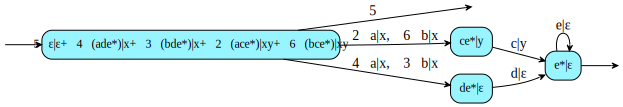

In [5]:
a1 = e1.derived_term()
a1

The 10 shortest "multitape words" it accepts are:

In [6]:
a1.shortest(10)

<5>\e|\e + <2>ac|xy + <4>ad|x + <6>bc|xy + <3>bd|x + <2>ace|xy + <4>ade|x + <6>bce|xy + <3>bde|x + <2>acee|xy

# Example $\mathcal{A}_3$: An Exponential Number of States
We introduce a three-tape context.  The graphical rendering is less satisfying.

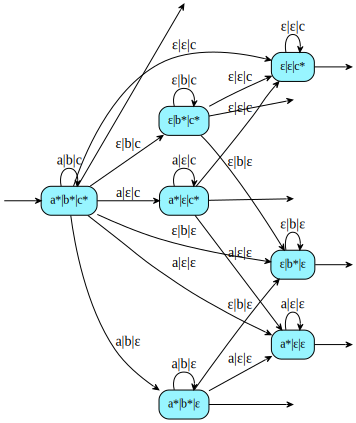

In [7]:
ctx3 = vcsn.context('lat<lan, lan, lan>, q')
a3 = ctx3.expression('a*|b*|c*').derived_term()
a3

Currently Vcsn is not able to extract nice rational expressions from such an automaton: it will always produce a "simple-tape expression over multitape generators":

In [8]:
a3.expression()

(a|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*+(\e|b|c)(\e|b|c)*(\e+(\e|\e|c)(\e|\e|c)*+(\e|b|\e)(\e|b|\e)*)+(a|\e|c)(a|\e|c)*(\e+(\e|\e|c)(\e|\e|c)*+(a|\e|\e)(a|\e|\e)*)+(a|b|\e)(a|b|\e)*(\e+(\e|b|\e)(\e|b|\e)*+(a|\e|\e)(a|\e|\e)*))

Instead of displaying the automaton, we may list its states, for instance in the case of a five-tape expression.

In [9]:
import re
def states(a):
    '''The states of an automaton, sorted.'''
    res = re.findall(r'label = "(.*?)", shape', a.dot(), re.M)
    res.sort()
    return res

ctx5 = vcsn.context('lat<lan(a), lan(b), lan(c), lan(d), lan(e)>, q')
e5 = ctx5.expression('a*|b*|c*|d*|e*')
e5

a*|b*|c*|d*|e*

In [10]:
e5.expansion()

<1> + \e|\e|\e|\e|e.[\e|\e|\e|\e|e*] + \e|\e|\e|d|\e.[\e|\e|\e|d*|\e] + \e|\e|\e|d|e.[\e|\e|\e|d*|e*] + \e|\e|c|\e|\e.[\e|\e|c*|\e|\e] + \e|\e|c|\e|e.[\e|\e|c*|\e|e*] + \e|\e|c|d|\e.[\e|\e|c*|d*|\e] + \e|\e|c|d|e.[\e|\e|c*|d*|e*] + \e|b|\e|\e|\e.[\e|b*|\e|\e|\e] + \e|b|\e|\e|e.[\e|b*|\e|\e|e*] + \e|b|\e|d|\e.[\e|b*|\e|d*|\e] + \e|b|\e|d|e.[\e|b*|\e|d*|e*] + \e|b|c|\e|\e.[\e|b*|c*|\e|\e] + \e|b|c|\e|e.[\e|b*|c*|\e|e*] + \e|b|c|d|\e.[\e|b*|c*|d*|\e] + \e|b|c|d|e.[\e|b*|c*|d*|e*] + a|\e|\e|\e|\e.[a*|\e|\e|\e|\e] + a|\e|\e|\e|e.[a*|\e|\e|\e|e*] + a|\e|\e|d|\e.[a*|\e|\e|d*|\e] + a|\e|\e|d|e.[a*|\e|\e|d*|e*] + a|\e|c|\e|\e.[a*|\e|c*|\e|\e] + a|\e|c|\e|e.[a*|\e|c*|\e|e*] + a|\e|c|d|\e.[a*|\e|c*|d*|\e] + a|\e|c|d|e.[a*|\e|c*|d*|e*] + a|b|\e|\e|\e.[a*|b*|\e|\e|\e] + a|b|\e|\e|e.[a*|b*|\e|\e|e*] + a|b|\e|d|\e.[a*|b*|\e|d*|\e] + a|b|\e|d|e.[a*|b*|\e|d*|e*] + a|b|c|\e|\e.[a*|b*|c*|\e|\e] + a|b|c|\e|e.[a*|b*|c*|\e|e*] + a|b|c|d|\e.[a*|b*|c*|d*|\e] + a|b|c|d|e.[a*|b*|c*|d*|e*]

In [11]:
a5 = e5.derived_term()
states(a5)

['a*|b*|c*|d*|e*',
 'a*|b*|c*|d*|ε',
 'a*|b*|c*|ε|e*',
 'a*|b*|c*|ε|ε',
 'a*|b*|ε|d*|e*',
 'a*|b*|ε|d*|ε',
 'a*|b*|ε|ε|e*',
 'a*|b*|ε|ε|ε',
 'a*|ε|c*|d*|e*',
 'a*|ε|c*|d*|ε',
 'a*|ε|c*|ε|e*',
 'a*|ε|c*|ε|ε',
 'a*|ε|ε|d*|e*',
 'a*|ε|ε|d*|ε',
 'a*|ε|ε|ε|e*',
 'a*|ε|ε|ε|ε',
 'ε|b*|c*|d*|e*',
 'ε|b*|c*|d*|ε',
 'ε|b*|c*|ε|e*',
 'ε|b*|c*|ε|ε',
 'ε|b*|ε|d*|e*',
 'ε|b*|ε|d*|ε',
 'ε|b*|ε|ε|e*',
 'ε|b*|ε|ε|ε',
 'ε|ε|c*|d*|e*',
 'ε|ε|c*|d*|ε',
 'ε|ε|c*|ε|e*',
 'ε|ε|c*|ε|ε',
 'ε|ε|ε|d*|e*',
 'ε|ε|ε|d*|ε',
 'ε|ε|ε|ε|e*']

## Example $\mathsf{E}_2$: A Sed-like Substitution

In [12]:
e2 = ctx.expression('(a{+}|x + b{+}|y)*')
e2

(aa*|x+bb*|y)*

In [13]:
e2.expansion()

<1> + a|x.[(a*|\e)(aa*|x+bb*|y)*] + b|y.[(b*|\e)(aa*|x+bb*|y)*]

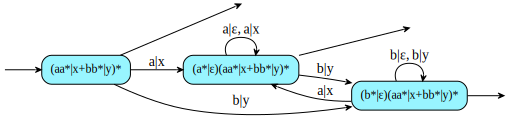

In [14]:
a2 = e2.derived_term()
a2

Again, the extracted expression is less readable.

In [15]:
a2.expression()

\e+(a|x)(a|\e+a|x)*+(b|y+(a|x)(a|\e+a|x)*(b|y))(b|\e+b|y+(a|x)(a|\e+a|x)*(b|y))*(\e+(a|x)(a|\e+a|x)*)

## A More Complex Expression
The previous examples often look like sed-like substitutions, in the sense that the first tape was often a composite expression, but the second tape a simple label.  There is no such limitation.

In [16]:
e = ctx.expression('(<2>[ab])* | (<3>[xy])*')
e

(<2>(a+b))*|(<3>(x+y))*

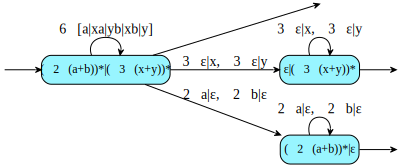

In [17]:
a = e.derived_term()
a

In [18]:
print('{:l}'.format(a.shortest(20)))

\e|\e
<3>\e|x
<3>\e|y
<2>a|\e
<6>a|x
<6>a|y
<2>b|\e
<6>b|x
<6>b|y
<9>\e|xx
<9>\e|xy
<9>\e|yx
<9>\e|yy
<18>a|xx
<18>a|xy
<18>a|yx
<18>a|yy
<18>b|xx
<18>b|xy
<18>b|yx
